In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

In [3]:
url = 'https://www.datosdeciclismo.com/api/actividades/?atleta=&a%C3%B1o=&mes=&dia=&tipo='

In [4]:
contenido = requests.get(url).text

In [5]:
objeto = json.loads(contenido)

In [6]:
lista = []

In [7]:
for i in range(len(objeto)):
    
    id = i
    fecha = [*objeto.values()][i]['Fecha']
    año = [*objeto.values()][i]['Año']
    mes = [*objeto.values()][i]['Mes']
    dia = [*objeto.values()][i]['Día']
    tipo = [*objeto.values()][i]['Tipo']
    altura = [*objeto.values()][i]['Altura']
    cadencia = [*objeto.values()][i]['Cadencia']
    distancia = [*objeto.values()][i]['Distancia']
    potencia = [*objeto.values()][i]['Potencia']
    pulsaciones = [*objeto.values()][i]['Pulsaciones']
    tiempo = [*objeto.values()][i]['Tiempo']
    velocidad = [*objeto.values()][i]['Velocidad']
    atleta = [*objeto.values()][i]['Atleta']
        
    lista.append([id,fecha,año,mes,dia,tipo,altura,cadencia,distancia,potencia,pulsaciones,tiempo,velocidad,atleta])

In [8]:
df = pd.DataFrame(lista, columns = ('id','fecha','año','mes','dia','tipo','altura','cadencia','distancia','potencia','pulsaciones','tiempo','velocidad','atleta') )

In [9]:
df.head()

,id,fecha,año,mes,dia,tipo,altura,cadencia,distancia,potencia,pulsaciones,tiempo,velocidad,atleta
0,0,20211102,2021,11,2,Virtual,162.0,87.6,63.46,143.3,91.9,2:00:02,31.72,Fernando Gonzalez
1,1,20211101,2021,11,1,Virtual,119.0,84.5,80.09,173.4,101.3,2:00:13,39.97,Fernando Gonzalez
2,2,20211101,2021,11,1,Ruta,0.0,82.7,0.00,154.5,116.9,0:40:05,0.00,Renzo Gherbassi
3,3,20211031,2021,10,31,Ruta,195.6,71.9,18.66,177.5,99.7,0:35:45,31.32,Agustin Perez
4,4,20211031,2021,10,31,Ruta,170.0,79.4,59.43,160.2,121.3,2:00:02,29.71,Renzo Gherbassi


In [10]:
df.shape

(1695, 14)

In [11]:
df = df.loc[ (df.atleta == 'Fernando Gonzalez') & (df.cadencia > 0) & (df.potencia > 0) & (df.pulsaciones > 0) & (df.pulsaciones < 160) , : ]

In [12]:
df.shape

(415, 14)

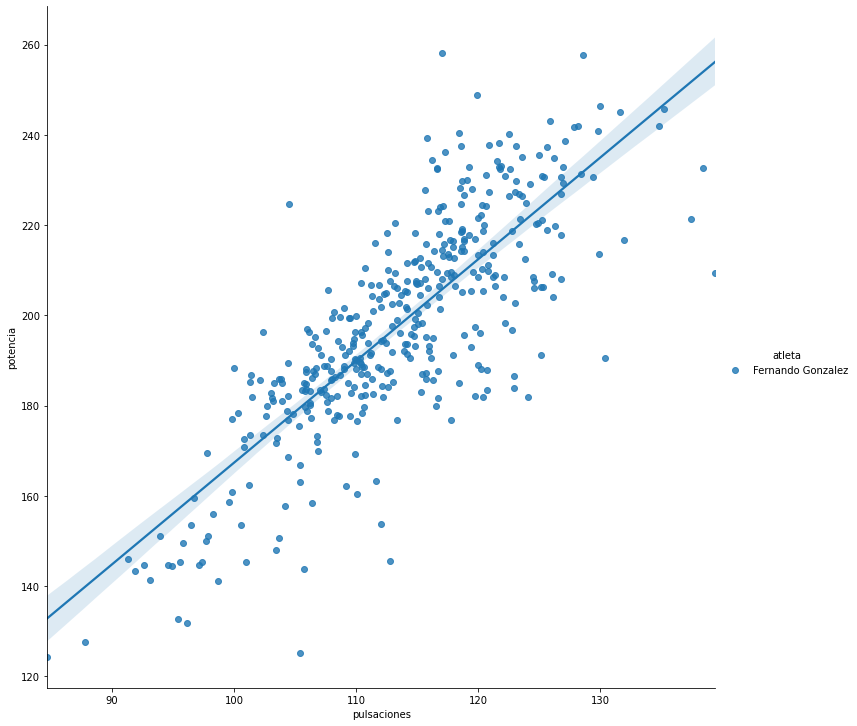

In [13]:
sns.lmplot(data=df,
           x="pulsaciones",
           y="potencia",
           hue="atleta",
           height=10)

In [48]:
#model = DecisionTreeRegressor(random_state=1)
model = LinearRegression()

In [15]:
x = df[['pulsaciones']]

In [16]:
y = df[['potencia']]

In [49]:
model.fit(x, y)

LinearRegression()

In [18]:
df.describe()

,id,año,mes,dia,altura,cadencia,distancia,potencia,pulsaciones,velocidad
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.00000,415.000000,415.000000
mean,919.746988,2020.843373,6.363855,15.792771,277.698795,85.885060,65.266434,197.92241,113.557590,37.475422
std,489.416443,0.363887,3.399367,8.839440,207.165302,3.690642,28.582628,24.27958,8.631497,3.499819
min,0.000000,2020.000000,1.000000,1.000000,4.000000,71.500000,5.500000,124.30000,84.700000,25.460000
25%,515.000000,2021.000000,3.000000,8.000000,106.500000,83.750000,41.460000,184.00000,107.900000,34.795000
50%,956.000000,2021.000000,6.000000,16.000000,242.000000,86.100000,70.140000,196.70000,114.000000,38.050000
75%,1353.000000,2021.000000,9.000000,23.000000,391.500000,88.150000,83.810000,214.30000,119.450000,40.530000
max,1693.000000,2021.000000,12.000000,31.000000,1198.000000,94.400000,140.040000,258.10000,139.400000,43.350000


In [45]:
print("Pulsaciones?")
pulsaciones = int(input())
print("La potencia estimada para" , pulsaciones, "pulsaciones es de", model.predict([[pulsaciones]]), "watts")

Pulsaciones?
1000
La potencia estimada para 1000 pulsaciones es de [209.4] watts


In [50]:
print(model.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'